<a href="https://colab.research.google.com/github/AnujaTheophilus/Newrepo/blob/main/Loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('/content/train_loan_preprocess.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: xlabel='LoanAmount', ylabel='Density'>

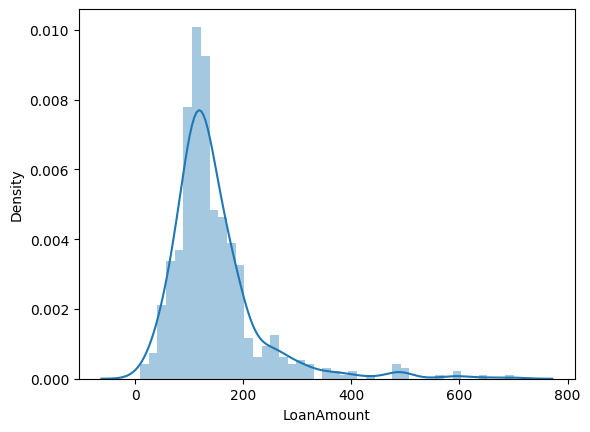

In [30]:
sns.distplot(df['LoanAmount'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

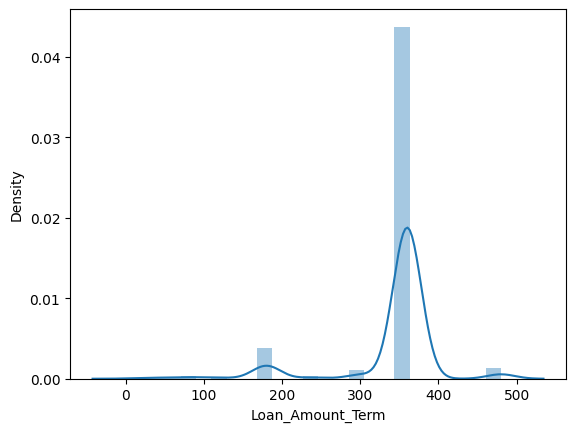

In [31]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Density'>

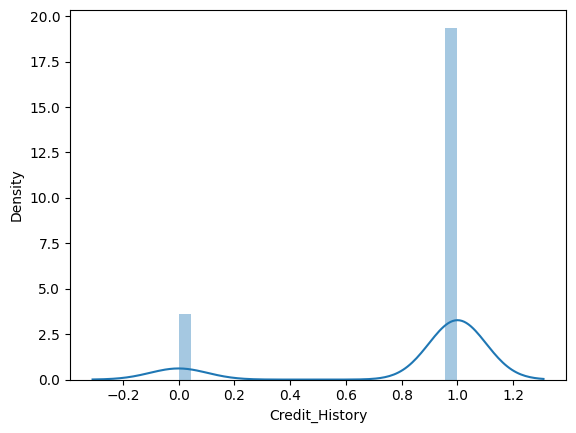

In [32]:
sns.distplot(df['Credit_History'])

In [49]:
replace_values = {'LoanAmount':df['LoanAmount'].median(),'Loan_Amount_Term':df['Loan_Amount_Term'].median(),'Credit_History':df['Credit_History'].median(),'Dependents':df['Dependents'].mode()[0],'Self_Employed':df['Self_Employed'].mode()[0]}
df.fillna(value=replace_values,inplace=True)

In [34]:
df.drop(['Gender','Married','Loan_ID'],axis=1,inplace=True)

In [35]:
df.isna().sum()

Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
columns = ['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Loan_Amount_Term','Credit_History']

In [ ]:
for i in columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=df[i])
  plt.title(f'box plot of {i}')
  plt.xlabel(i)
  plt.show()

In [38]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [40]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()

In [43]:
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])

In [44]:
df

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,3+,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [48]:
df['Property_Area'].value_counts()

Property_Area
1    233
2    202
0    179
Name: count, dtype: int64

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [51]:
scaling = MinMaxScaler()
scaled_data = scaling.fit_transform(df[columns])

In [52]:
scaled_data

array([[0.19885986, 0.07048856, 0.        , 0.74358974, 0.74358974,
        1.        ],
       [0.17221418, 0.05482993, 0.03619171, 0.74358974, 0.74358974,
        1.        ],
       [0.08248915, 0.03525046, 0.        , 0.74358974, 0.74358974,
        1.        ],
       ...,
       [0.35311143, 0.09798392, 0.00575995, 0.74358974, 0.74358974,
        1.        ],
       [0.25759768, 0.09193568, 0.        , 0.74358974, 0.74358974,
        1.        ],
       [0.17945007, 0.05482993, 0.        , 0.74358974, 0.74358974,
        0.        ]])

In [54]:
std_scaling = StandardScaler()
std_data = std_scaling.fit_transform(df[columns])

In [57]:
corr_matrix = df[columns].corr()
corr_matrix

,LoanAmount,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Loan_Amount_Term,Credit_History
LoanAmount,1.000000,0.565620,0.187828,0.038801,0.038801,-0.007738
ApplicantIncome,0.565620,1.000000,-0.116605,-0.045242,-0.045242,-0.014477
CoapplicantIncome,0.187828,-0.116605,1.000000,-0.059675,-0.059675,-0.001665
Loan_Amount_Term,0.038801,-0.045242,-0.059675,1.000000,1.000000,0.001395
Loan_Amount_Term,0.038801,-0.045242,-0.059675,1.000000,1.000000,0.001395
Credit_History,-0.007738,-0.014477,-0.001665,0.001395,0.001395,1.000000


<Axes: >

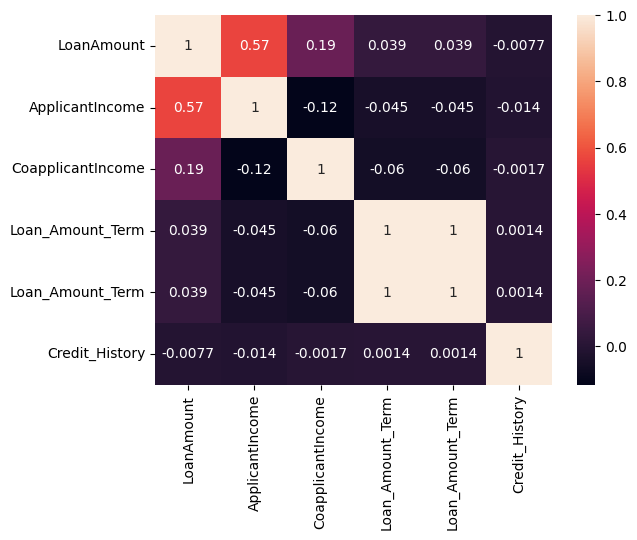

In [58]:
sns.heatmap(corr_matrix,annot=True)